<h1><center>Heart Failure Prediction</center></h1>
<hr>

In [1]:
import re
import os
import time
import scipy

from tqdm import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


<p>Above data contains total of 13 columns, each of them containing 299 non-null entries</p>

In [4]:
data.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


In [5]:
print("Shape of the data is : ", data.shape)
data.head()

Shape of the data is :  (299, 13)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


<h1><center>Exploratory Data Analysis</center></h1>
<hr>

## [1] EDA : Discrete Variables

#### [1.1] Death Event analysis

Total Unique Class labels available in this dataset are : 
0    203
1     96
Name: DEATH_EVENT, dtype: int64



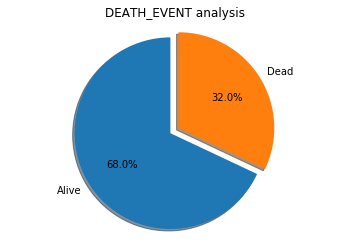

In [6]:
#DEATH_EVENT
print("Total Unique Class labels available in this dataset are : ")
print(data['DEATH_EVENT'].value_counts())

print("")

classes = dict(data['DEATH_EVENT'].value_counts())
total = sum(classes.values())
alive = round(classes[0]/total, 2)
dead  = round(classes[1]/total, 2)

#plotting Pie Chart
#https://matplotlib.org/3.1.1/gallery/pie_and_polar_charts/pie_features.html
labels    = 'Alive', 'Dead'
sizes     = [alive, dead]
explode   = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.set_title("DEATH_EVENT analysis")
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%', shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

<p>From above, we can clearly see, there are large portion of people, having cured from CVDs, which counts to 68%.</p>
<p>Out of all, 32% of the people had to loose their lives due to Heart Diseases.</p>

#### [1.2] Gender Analysis

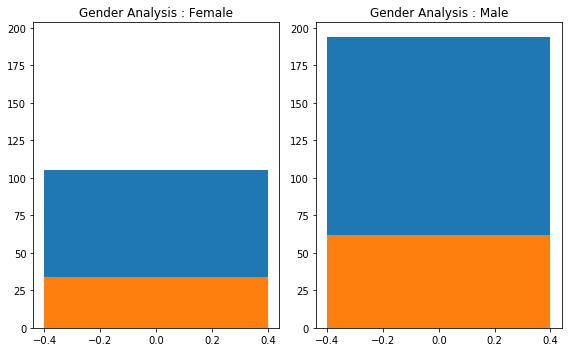

In [7]:
gender_analysis          = pd.DataFrame(data.groupby(by=['sex'])['DEATH_EVENT']\
                                        .agg(lambda x:x.eq(1).sum())).reset_index()
gender_analysis['Total'] = pd.DataFrame(data.groupby(by=['sex'])['DEATH_EVENT']\
                                        .agg(total='count')).reset_index()['total']
gender_analysis['Avg']   = pd.DataFrame(data.groupby(by=['sex'])['DEATH_EVENT']\
                                        .agg(avg='mean')).reset_index()['avg']

plt.figure(figsize=(8, 5))
plt.title('Gender Analysis')

ax1 = plt.subplot(121)
ax1.set_title('Gender Analysis : Female')
b1 = plt.bar(np.arange(1), gender_analysis[gender_analysis['sex']==0]['Total'])
b2 = plt.bar(np.arange(1), gender_analysis[gender_analysis['sex']==0]['DEATH_EVENT'])

ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('Gender Analysis : Male')
b3 = plt.bar(np.arange(1), gender_analysis[gender_analysis['sex']==1]['Total'])
b4 = plt.bar(np.arange(1), gender_analysis[gender_analysis['sex']==1]['DEATH_EVENT'])

plt.tight_layout()
plt.show()

In [8]:
print("Analysis on Females : ")
females = int(gender_analysis[gender_analysis['sex']==0]['Total'])
print("Percentage of females present are : {0}%".format(round((females/data.shape[0])*100, 2)))

females_deceased = int(gender_analysis[gender_analysis['sex']==0]['DEATH_EVENT'])
print("Percentage of females which are Deceased are : {0}%".format(round((females_deceased/females)*100, 2)))


print("\nAnalysis on Males : ")
males = int(gender_analysis[gender_analysis['sex']==1]['Total'])
print("Percentage of males present are : {0}%".format(round((males/data.shape[0])*100, 2)))

males_deceased = int(gender_analysis[gender_analysis['sex']==1]['DEATH_EVENT'])
print("Percentage of males which are Deceased are : {0}%".format(round((males_deceased/males)*100, 2)))


print(" ")
print(gender_analysis[['Total', 'DEATH_EVENT']])

Analysis on Females : 
Percentage of females present are : 35.12%
Percentage of females which are Deceased are : 32.38%

Analysis on Males : 
Percentage of males present are : 64.88%
Percentage of males which are Deceased are : 31.96%
 
   Total  DEATH_EVENT
0    105           34
1    194           62


<p>
    Out of two genders available in dataset, we can see, Male are present in large numbers in the dataset and also comparing their total count, 31.95% of them dies due to Heart Disease.
</p>
<p>
    Females on the other hand, only contribute to 35% cases from complete dataset and out of them, 32% of the females are deceased due to heart issues.
</p>

#### [1.3] Anaemia Analysis

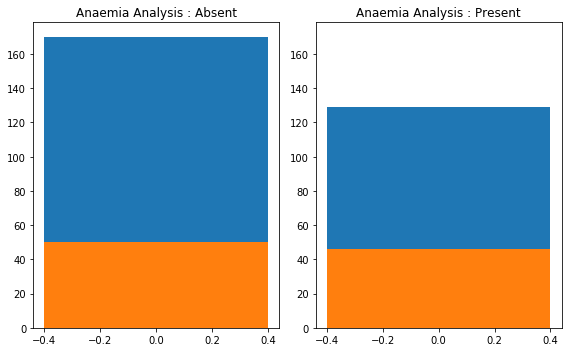

In [9]:
anaemia_analysis          = pd.DataFrame(data.groupby(by=['anaemia'])['DEATH_EVENT']\
                                        .agg(lambda x:x.eq(1).sum())).reset_index()
anaemia_analysis['Total'] = pd.DataFrame(data.groupby(by=['anaemia'])['DEATH_EVENT']\
                                        .agg(total='count')).reset_index()['total']
anaemia_analysis['Avg']   = pd.DataFrame(data.groupby(by=['anaemia'])['DEATH_EVENT']\
                                        .agg(avg='mean')).reset_index()['avg']

plt.figure(figsize=(8, 5))
plt.title('Anaemia Analysis')

ax1 = plt.subplot(121)
ax1.set_title('Anaemia Analysis : Absent')
b1 = plt.bar(np.arange(1), anaemia_analysis[anaemia_analysis['anaemia']==0]['Total'])
b2 = plt.bar(np.arange(1), anaemia_analysis[anaemia_analysis['anaemia']==0]['DEATH_EVENT'])

ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('Anaemia Analysis : Present')
b3 = plt.bar(np.arange(1), anaemia_analysis[anaemia_analysis['anaemia']==1]['Total'])
b4 = plt.bar(np.arange(1), anaemia_analysis[anaemia_analysis['anaemia']==1]['DEATH_EVENT'])

plt.tight_layout()
plt.show()

In [10]:
print("Analysis on Anaemia Absent : ")
anaemia_a = int(anaemia_analysis[anaemia_analysis['anaemia']==0]['Total'])
print("Percentage of patients where anaemia absent : {0}%".format(round((anaemia_a/data.shape[0])*100, 2)))

anaemia_a_deceased = int(anaemia_analysis[anaemia_analysis['anaemia']==0]['DEATH_EVENT'])
print("Percentage of females which are Deceased are : {0}%".format(round((anaemia_a_deceased/anaemia_a)*100, 2)))


print("\nAnalysis on Anaemia Present : ")
anaemia_p = int(anaemia_analysis[anaemia_analysis['anaemia']==1]['Total'])
print("Percentage of males present are : {0}%".format(round((anaemia_p/data.shape[0])*100, 2)))

anaemia_p_deceased = int(anaemia_analysis[anaemia_analysis['anaemia']==1]['DEATH_EVENT'])
print("Percentage of males which are Deceased are : {0}%".format(round((anaemia_p_deceased/anaemia_p)*100, 2)))


print(" ")
print(anaemia_analysis[['Total', 'DEATH_EVENT']])

Analysis on Anaemia Absent : 
Percentage of patients where anaemia absent : 56.86%
Percentage of females which are Deceased are : 29.41%

Analysis on Anaemia Present : 
Percentage of males present are : 43.14%
Percentage of males which are Deceased are : 35.66%
 
   Total  DEATH_EVENT
0    170           50
1    129           46


#### [1.4] High Blood Pressure Analysis

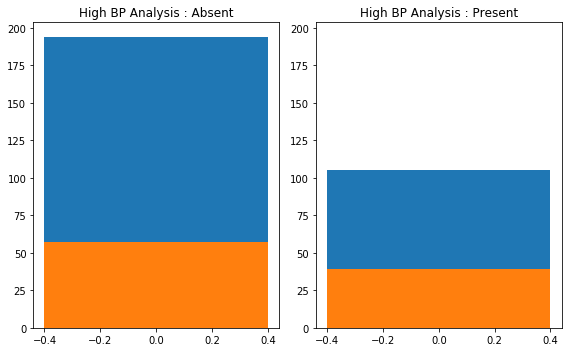

In [11]:
bp_analysis          = pd.DataFrame(data.groupby(by=['high_blood_pressure'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
bp_analysis['Total'] = pd.DataFrame(data.groupby(by=['high_blood_pressure'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
bp_analysis['Avg']   = pd.DataFrame(data.groupby(by=['high_blood_pressure'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

plt.figure(figsize=(8, 5))
plt.title('High Blood Pressure Analysis')

ax1 = plt.subplot(121)
ax1.set_title('High BP Analysis : Absent')
b1 = plt.bar(np.arange(1), bp_analysis[bp_analysis['high_blood_pressure']==0]['Total'])
b2 = plt.bar(np.arange(1), bp_analysis[bp_analysis['high_blood_pressure']==0]['DEATH_EVENT'])

ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('High BP Analysis : Present')
b3 = plt.bar(np.arange(1), bp_analysis[bp_analysis['high_blood_pressure']==1]['Total'])
b4 = plt.bar(np.arange(1), bp_analysis[bp_analysis['high_blood_pressure']==1]['DEATH_EVENT'])

plt.tight_layout()
plt.show()

In [12]:
print("Analysis on absence of High Blood Pressure : ")
bp_a = int(bp_analysis[bp_analysis['high_blood_pressure']==0]['Total'])
print("Percentage of patients with absence of High Blood Pressure : {0}%".format(round((bp_a/data.shape[0])*100, 2)))

bp_a_deceased = int(bp_analysis[bp_analysis['high_blood_pressure']==0]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((bp_a_deceased/bp_a)*100, 2)))


print("\nAnalysis on presence of High Blood Pressure : ")
bp_p = int(bp_analysis[bp_analysis['high_blood_pressure']==1]['Total'])
print("Percentage of patients with presence of High Blood Pressure : {0}%".format(round((anaemia_p/data.shape[0])*100, 2)))

bp_p_deceased = int(bp_analysis[bp_analysis['high_blood_pressure']==1]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((anaemia_p_deceased/bp_p)*100, 2)))

print(" ")
print(bp_analysis[['Total', 'DEATH_EVENT']])

Analysis on absence of High Blood Pressure : 
Percentage of patients with absence of High Blood Pressure : 64.88%
Percentage of patients which are Deceased are : 29.38%

Analysis on presence of High Blood Pressure : 
Percentage of patients with presence of High Blood Pressure : 43.14%
Percentage of patients which are Deceased are : 43.81%
 
   Total  DEATH_EVENT
0    194           57
1    105           39


#### [1.5] Smoking Analysis

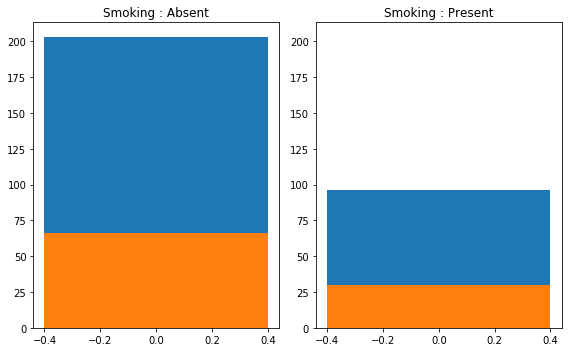

In [13]:
smoke_analysis          = pd.DataFrame(data.groupby(by=['smoking'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
smoke_analysis['Total'] = pd.DataFrame(data.groupby(by=['smoking'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
smoke_analysis['Avg']   = pd.DataFrame(data.groupby(by=['smoking'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

plt.figure(figsize=(8, 5))
plt.title('Smoking Analysis')

ax1 = plt.subplot(121)
ax1.set_title('Smoking : Absent')
b1 = plt.bar(np.arange(1), smoke_analysis[smoke_analysis['smoking']==0]['Total'])
b2 = plt.bar(np.arange(1), smoke_analysis[smoke_analysis['smoking']==0]['DEATH_EVENT'])

ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('Smoking : Present')
b3 = plt.bar(np.arange(1), smoke_analysis[smoke_analysis['smoking']==1]['Total'])
b4 = plt.bar(np.arange(1), smoke_analysis[smoke_analysis['smoking']==1]['DEATH_EVENT'])

plt.tight_layout()
plt.show()

In [14]:
print("Analysis on Absence of Smoking : ")
smoking_a = int(smoke_analysis[smoke_analysis['smoking']==0]['Total'])
print("Percentage of patients where Absence of Smoking : {0}%".format(round((smoking_a/data.shape[0])*100, 2)))

smoking_a_deceased = int(smoke_analysis[smoke_analysis['smoking']==0]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((smoking_a_deceased/smoking_a)*100, 2)))


print("\nAnalysis on Presence of Smoking: ")
smoking_p = int(smoke_analysis[smoke_analysis['smoking']==1]['Total'])
print("Percentage of patients present are : {0}%".format(round((smoking_p/data.shape[0])*100, 2)))

smoking_p_deceased = int(smoke_analysis[smoke_analysis['smoking']==1]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((smoking_p_deceased/smoking_p)*100, 2)))

print(" ")
print(smoke_analysis[['Total', 'DEATH_EVENT']])

Analysis on Absence of Smoking : 
Percentage of patients where Absence of Smoking : 67.89%
Percentage of patients which are Deceased are : 32.51%

Analysis on Presence of Smoking: 
Percentage of patients present are : 32.11%
Percentage of patients which are Deceased are : 31.25%
 
   Total  DEATH_EVENT
0    203           66
1     96           30


#### [1.6] Diabetese Analysis

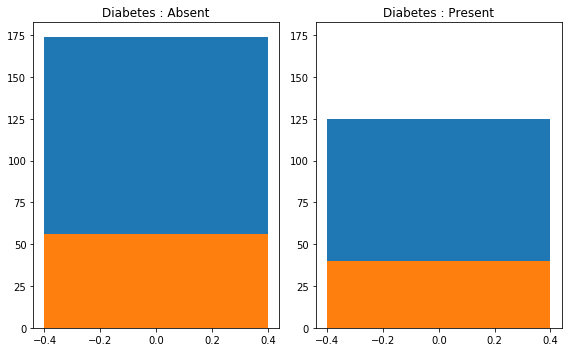

In [15]:
diabetes_analysis          = pd.DataFrame(data.groupby(by=['diabetes'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
diabetes_analysis['Total'] = pd.DataFrame(data.groupby(by=['diabetes'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
diabetes_analysis['Avg']   = pd.DataFrame(data.groupby(by=['diabetes'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

plt.figure(figsize=(8, 5))
plt.title('Diabetes Analysis')

ax1 = plt.subplot(121)
ax1.set_title('Diabetes : Absent')
b1 = plt.bar(np.arange(1), diabetes_analysis[diabetes_analysis['diabetes']==0]['Total'])
b2 = plt.bar(np.arange(1), diabetes_analysis[diabetes_analysis['diabetes']==0]['DEATH_EVENT'])

ax2 = plt.subplot(122, sharey=ax1)
ax2.set_title('Diabetes : Present')
b3 = plt.bar(np.arange(1), diabetes_analysis[diabetes_analysis['diabetes']==1]['Total'])
b4 = plt.bar(np.arange(1), diabetes_analysis[diabetes_analysis['diabetes']==1]['DEATH_EVENT'])

plt.tight_layout()
plt.show()

In [16]:
print("Analysis on Absence of Diabetese : ")
diabetese_a = int(diabetes_analysis[diabetes_analysis['diabetes']==0]['Total'])
print("Percentage of patients with Absence of Diabetese : {0}%".format(round((diabetese_a/data.shape[0])*100, 2)))

diabetese_a_deceased = int(diabetes_analysis[diabetes_analysis['diabetes']==0]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((diabetese_a_deceased/diabetese_a)*100, 2)))


print("\nAnalysis on Presence of Smoking: ")
diabetese_p = int(diabetes_analysis[diabetes_analysis['diabetes']==1]['Total'])
print("Percentage of patients with Presence of Diabetese are : {0}%".format(round((diabetese_p/data.shape[0])*100, 2)))

diabetese_p_deceased = int(diabetes_analysis[diabetes_analysis['diabetes']==1]['DEATH_EVENT'])
print("Percentage of patients which are Deceased are : {0}%".format(round((diabetese_p_deceased/diabetese_p)*100, 2)))

print(" ")
print(diabetes_analysis[['Total', 'DEATH_EVENT']])

Analysis on Absence of Diabetese : 
Percentage of patients with Absence of Diabetese : 58.19%
Percentage of patients which are Deceased are : 32.18%

Analysis on Presence of Smoking: 
Percentage of patients with Presence of Diabetese are : 41.81%
Percentage of patients which are Deceased are : 32.0%
 
   Total  DEATH_EVENT
0    174           56
1    125           40


<p>Comparing the EDA analysis of all categorical features, we can see that heart failure can be seen in people with all given category of symptoms. The amount of patients who experienced heart failure also present in adquete amount even though symptoms of given features were absent in them.</p>

## [2] EDA : Continuous Variable

#### [2.1] Age Analysis 

<p>Age plays the important role in any desease or body complications.</p>

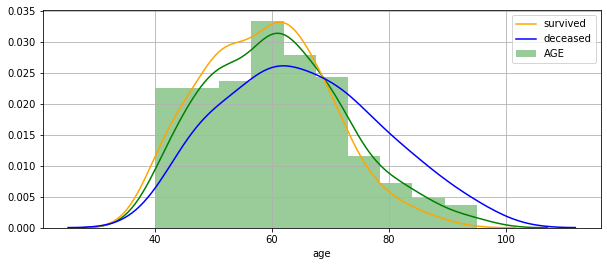

Age Analysis :::
Minimum age found is 40.000000
Average age found is 60.833893
Maximum age found is 95.000000

Age Analysis ::: Patients who survived
Minimum age for patient found to be 40.000000
Average age for patient found to be is 58.761906
Maximum age for patient found to be is 90.000000

Age Analysis ::: Patients who couldn't survive
Minimum age for patient found to be 42.000000
Average age for patient found to be is 65.215281
Maximum age for patient found to be is 95.000000


In [17]:
age_analysis = data[['age', 'DEATH_EVENT']]

plt.figure(figsize=(10, 4))
sns.distplot(data['age'], hist=True, label='AGE', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['age'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['age'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

print("Age Analysis :::")
print("Minimum age found is %f"%data['age'].min())
print("Average age found is %f"%data['age'].mean())
print("Maximum age found is %f"%data['age'].max())

print("\nAge Analysis ::: Patients who survived")
print("Minimum age for patient found to be %f"%data[data['DEATH_EVENT']==0]['age'].min())
print("Average age for patient found to be is %f"%data[data['DEATH_EVENT']==0]['age'].mean())
print("Maximum age for patient found to be is %f"%data[data['DEATH_EVENT']==0]['age'].max())

print("\nAge Analysis ::: Patients who couldn't survive")
print("Minimum age for patient found to be %f"%data[data['DEATH_EVENT']==1]['age'].min())
print("Average age for patient found to be is %f"%data[data['DEATH_EVENT']==1]['age'].mean())
print("Maximum age for patient found to be is %f"%data[data['DEATH_EVENT']==1]['age'].max())

<p>We can bin the Age feature to convert it into categrical feature</p>

In [20]:
def bin_age(age):
    """
    function to bin age variable which is continuous
    Age < 40       : 0
    40 <= Age < 50 : 1
    50 <= Age < 60 : 2
    60 <= Age < 70 : 3
    70 <= Age < 80 : 4
    80 <= Age < 90 : 5
    90 <= Age      : 6
    """
    if age<40:
        return 0
    elif (age>=40) and (age<50):
        return 1
    elif (age>=50) and (age<60):
        return 2
    elif (age>=60) and (age<70):
        return 3
    elif (age>=70) and (age<80):
        return 4
    elif (age>=80) and (age<90):
        return 5
    else:
        return 6

data['age_bin'] = data['age'].map(bin_age)

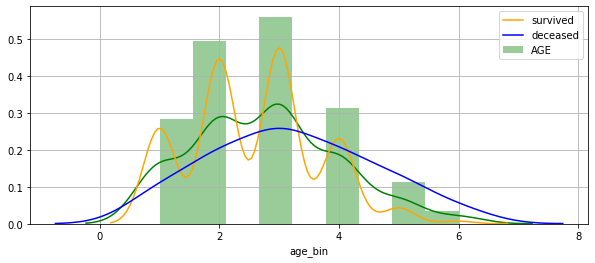

In [21]:
plt.figure(figsize=(10, 4))
sns.distplot(data['age_bin'], hist=True, label='AGE', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['age_bin'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['age_bin'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

In [22]:
age_analysis          = pd.DataFrame(data.groupby(by=['age_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
age_analysis['Total'] = pd.DataFrame(data.groupby(by=['age_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
age_analysis['Avg']   = pd.DataFrame(data.groupby(by=['age_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

age_analysis.head()

,age_bin,DEATH_EVENT,Total,Avg
0,1,11,47,0.234043
1,2,20,82,0.243902
2,3,27,93,0.290323
3,4,20,52,0.384615
4,5,13,19,0.684211


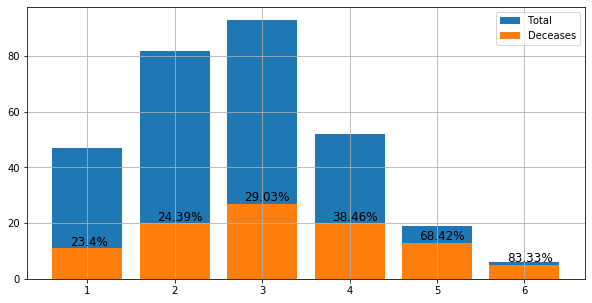

In [23]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(age_analysis.age_bin)), age_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(age_analysis.age_bin)), age_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.20, i.get_height()+1, str(round(age_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.xticks(np.arange(len(age_analysis.age_bin.values)), age_analysis.age_bin.values)
plt.grid()
plt.show()

#### [2.2] creatinine_phosphokinase Analysis

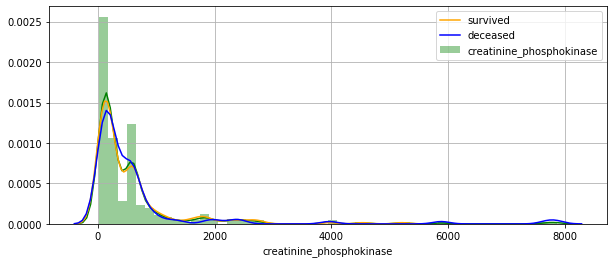

Creatinine_phosphokinase Analysis :::
Minimum creatinine_phosphokinase found is 23.000000
Average creatinine_phosphokinase found is 581.839465
Maximum creatinine_phosphokinase found is 7861.000000

Creatinine_phosphokinase Analysis ::: Patients who survived
Minimum creatinine_phosphokinase for patient found to be 30.000000
Average creatinine_phosphokinase for patient found to be is 540.054187
Maximum creatinine_phosphokinase for patient found to be is 5209.000000

Creatinine_phosphokinase Analysis ::: Patients who couldn't survive
Minimum creatinine_phosphokinase for patient found to be 23.000000
Average creatinine_phosphokinase for patient found to be is 670.197917
Maximum creatinine_phosphokinase for patient found to be is 7861.000000


In [24]:
#creatinine_phosphokinase

plt.figure(figsize=(10, 4))
sns.distplot(data['creatinine_phosphokinase'], hist=True, label='creatinine_phosphokinase', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

print("Creatinine_phosphokinase Analysis :::")
print("Minimum creatinine_phosphokinase found is %f"%data['creatinine_phosphokinase'].min())
print("Average creatinine_phosphokinase found is %f"%data['creatinine_phosphokinase'].mean())
print("Maximum creatinine_phosphokinase found is %f"%data['creatinine_phosphokinase'].max())

print("\nCreatinine_phosphokinase Analysis ::: Patients who survived")
print("Minimum creatinine_phosphokinase for patient found to be %f"%data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'].min())
print("Average creatinine_phosphokinase for patient found to be is %f"%data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'].mean())
print("Maximum creatinine_phosphokinase for patient found to be is %f"%data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'].max())

print("\nCreatinine_phosphokinase Analysis ::: Patients who couldn't survive")
print("Minimum creatinine_phosphokinase for patient found to be %f"%data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'].min())
print("Average creatinine_phosphokinase for patient found to be is %f"%data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'].mean())
print("Maximum creatinine_phosphokinase for patient found to be is %f"%data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'].max())

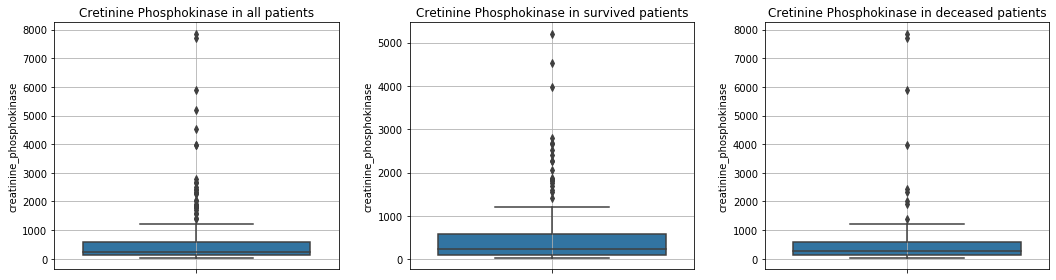

In [25]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['creatinine_phosphokinase'], ax=ax1)
ax1.set_title('Cretinine Phosphokinase in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'], ax=ax2)
ax2.set_title('Cretinine Phosphokinase in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'], ax=ax3)
ax3.set_title('Cretinine Phosphokinase in deceased patients')
ax3.grid()

plt.tight_layout()
plt.show()

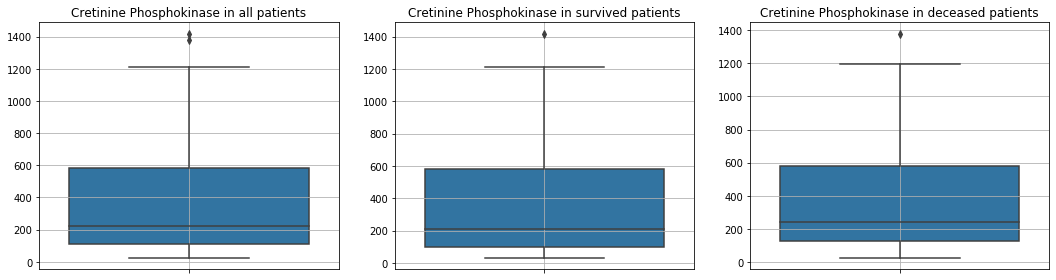

In [26]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=[x for x in data['creatinine_phosphokinase'].values if x < 1500], ax=ax1)
ax1.set_title('Cretinine Phosphokinase in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==0]['creatinine_phosphokinase'].values if x < 1500], ax=ax2)
ax2.set_title('Cretinine Phosphokinase in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==1]['creatinine_phosphokinase'].values if x < 1500], ax=ax3)
ax3.set_title('Cretinine Phosphokinase in deceased patients')
ax3.grid()

plt.tight_layout()
plt.show()

In [27]:
def bin_creatinine_phosphokinase(creatinine):
    """
    binning creatinine phosphokinase 
    cp  < 0 : 0
    0   <= cp  < 200  : 1
    200 <= cp  < 400  : 2
    400 <= cp  < 600  : 3
    600 <= cp  < 800  : 4
    800 <= cp  < 1000 : 5
    1000 <= cp < 1200 : 6
    1200 <= cp        : 7
    """
    if creatinine<0:
        return 0
    elif (creatinine>=0) and (creatinine<200):
        return 1
    elif (creatinine>=200) and (creatinine<400):
        return 2
    elif (creatinine>=400) and (creatinine<600):
        return 3
    elif (creatinine>=600) and (creatinine<800):
        return 4
    elif (creatinine>=800) and (creatinine<1000):
        return 5
    elif (creatinine>=1000) and (creatinine<1200):
        return 6
    else:
        return 7

data['creatinine_phosphokinase_bin'] = data['creatinine_phosphokinase'].map(bin_creatinine_phosphokinase)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1


In [28]:
cp_analysis          = pd.DataFrame(data.groupby(by=['creatinine_phosphokinase_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
cp_analysis['Total'] = pd.DataFrame(data.groupby(by=['creatinine_phosphokinase_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
cp_analysis['Avg']   = pd.DataFrame(data.groupby(by=['creatinine_phosphokinase_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

cp_analysis.head()

,creatinine_phosphokinase_bin,DEATH_EVENT,Total,Avg
0,1,40,128,0.312500
1,2,17,49,0.346939
2,3,23,59,0.389831
3,4,2,15,0.133333
4,5,4,12,0.333333


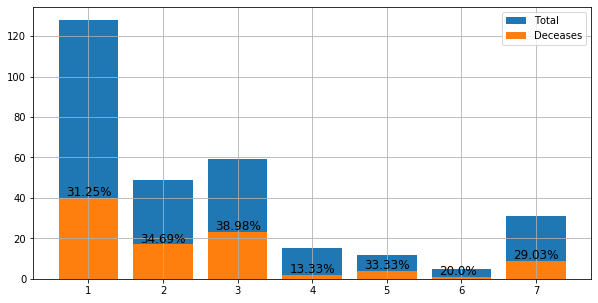

In [29]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(cp_analysis.creatinine_phosphokinase_bin)), cp_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(cp_analysis.creatinine_phosphokinase_bin)), cp_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.10, i.get_height()+1, str(round(cp_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.xticks(np.arange(len(cp_analysis.creatinine_phosphokinase_bin.values)), cp_analysis.creatinine_phosphokinase_bin.values)
plt.grid()
plt.show()

#### [2.3] Ejection Fraction Analysis

<p>The ejection fraction measures how much blood inside the ventricle is pumped out with each contraction. The left ventricle squeezes and pumps some (but not all) of the blood in the ventricle out to your body. A normal ejection fraction is more than 55%. This means that 55% of the total blood in the left ventricle is pumped out with each heartbeat.</p>

<p>
    <li>Ejection Fraction (EF) 55% to 70%    :: Normal</li>
    <li>Ejection Fraction (EF) 40% to 54%    :: Slightly below normal</li>
    <li>Ejection Fraction (EF) 35% to 39%    :: Moderately below normal</li>
    <li>Ejection Fraction (EF) Less than 35% :: Severely below normal</li>
</p>

<p>reference link : https://my.clevelandclinic.org/health/diseases/17069-heart-failure-understanding-heart-failure</p>

In [30]:
data['ejection_fraction'].value_counts().head()

35    49
38    40
40    37
25    36
30    34
Name: ejection_fraction, dtype: int64

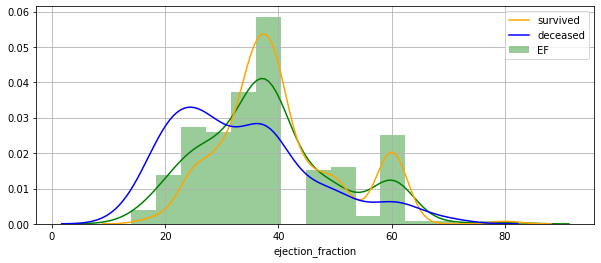

In [31]:
plt.figure(figsize=(10, 4))
sns.distplot(data['ejection_fraction'], hist=True, label='EF', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['ejection_fraction'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['ejection_fraction'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

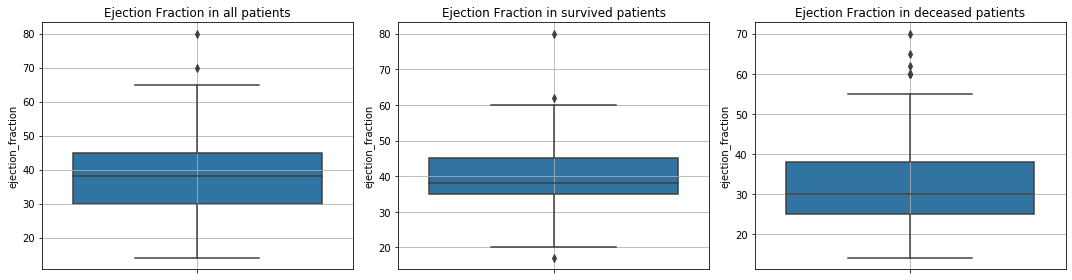

In [32]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['ejection_fraction'], ax=ax1)
ax1.set_title('Ejection Fraction in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['ejection_fraction'], ax=ax2)
ax2.set_title('Ejection Fraction in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['ejection_fraction'], ax=ax3)
ax3.set_title('Ejection Fraction in deceased patients')
ax3.grid()

plt.tight_layout()
plt.show()

In [33]:
def bin_ef(x):
    """
    binning ejection fraction
    35 <= ef : 0
    35 < ef <= 39 : 1
    39 < ef <= 54 : 2
    54 < ef <= 70 : 3
    70 < ef       : 4
    """
    if x<=35:
        return 0
    elif (x>35) and (x<=39):
        return 1
    elif (x>39) and (x<=54):
        return 2
    elif (x>54) and (x<=70):
        return 3
    else:
        return 4
    
data['ejection_fraction_bin'] = data['ejection_fraction'].map(bin_ef)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3,0
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1,0
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1,0
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1,0


In [34]:
ef_analysis          = pd.DataFrame(data.groupby(by=['ejection_fraction_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
ef_analysis['Total'] = pd.DataFrame(data.groupby(by=['ejection_fraction_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
ef_analysis['Avg']   = pd.DataFrame(data.groupby(by=['ejection_fraction_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

ef_analysis.head()

,ejection_fraction_bin,DEATH_EVENT,Total,Avg
0,0,58,142,0.408451
1,1,15,40,0.375000
2,2,15,78,0.192308
3,3,8,38,0.210526
4,4,0,1,0.000000


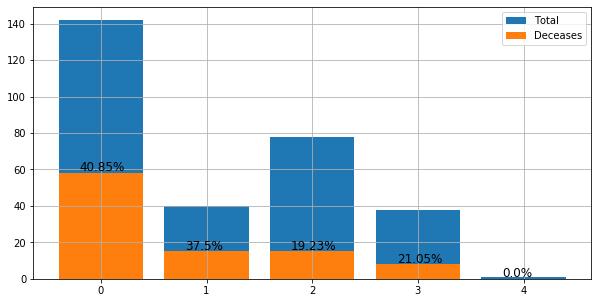

In [35]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(ef_analysis.ejection_fraction_bin)), ef_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(ef_analysis.ejection_fraction_bin)), ef_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.20, i.get_height()+1, str(round(ef_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.grid()
plt.show()

#### [2.4] Platelets Analysis

In [36]:
data['platelets'].value_counts().head()

263358.03    25
271000.00     4
221000.00     4
255000.00     4
228000.00     4
Name: platelets, dtype: int64

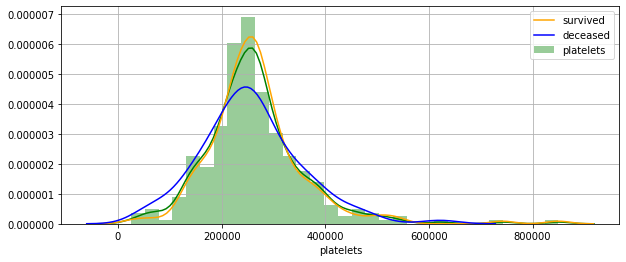

In [37]:
plt.figure(figsize=(10, 4))
sns.distplot(data['platelets'], hist=True, label='platelets', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['platelets'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['platelets'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

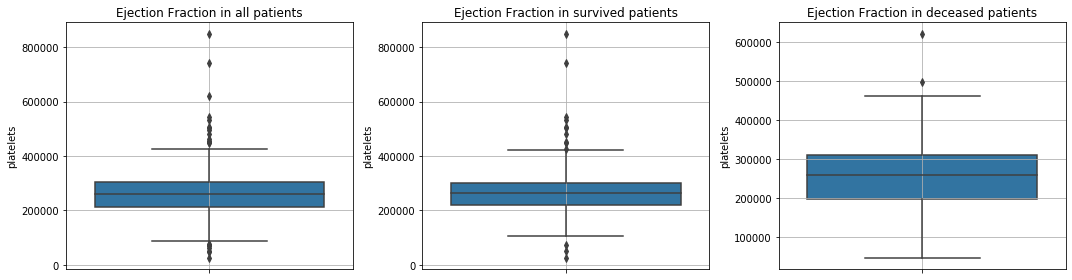

In [38]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['platelets'], ax=ax1)
ax1.set_title('Ejection Fraction in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['platelets'], ax=ax2)
ax2.set_title('Ejection Fraction in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['platelets'], ax=ax3)
ax3.set_title('Ejection Fraction in deceased patients')
ax3.grid()


plt.tight_layout()
plt.show()

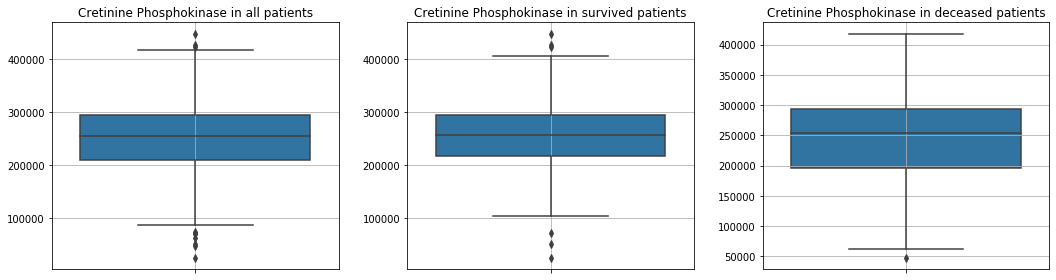

In [39]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=[x for x in data['platelets'].values if x < 450000], ax=ax1)
ax1.set_title('Cretinine Phosphokinase in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==0]['platelets'].values if x < 450000], ax=ax2)
ax2.set_title('Cretinine Phosphokinase in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==1]['platelets'].values if x < 450000], ax=ax3)
ax3.set_title('Cretinine Phosphokinase in deceased patients')
ax3.grid()

plt.tight_layout()
plt.show()

In [40]:
def bin_platelates(x):
    """
    for binning platelate counts
    """
    if x<=100000:
        return 0
    elif (x>100000) and (x<=200000):
        return 1
    elif (x>200000) and (x<=250000):
        return 2
    elif (x>250000) and (x<=300000):
        return 3
    elif (x>300000) and (x<=400000):
        return 4
    else:
        return 5

data['platelates_bin'] = data['platelets'].map(bin_platelates)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3,0,3
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7,1,3
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1,0,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1,0,2
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1,0,4


In [41]:
platelate_analysis          = pd.DataFrame(data.groupby(by=['platelates_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
platelate_analysis['Total'] = pd.DataFrame(data.groupby(by=['platelates_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
platelate_analysis['Avg']   = pd.DataFrame(data.groupby(by=['platelates_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

platelate_analysis.head()

,platelates_bin,DEATH_EVENT,Total,Avg
0,0,5,8,0.625000
1,1,21,55,0.381818
2,2,19,72,0.263889
3,3,24,84,0.285714
4,4,21,60,0.350000


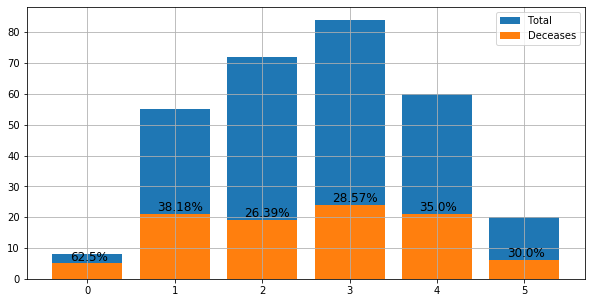

In [42]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(platelate_analysis.platelates_bin)), platelate_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(platelate_analysis.platelates_bin)), platelate_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.20, i.get_height()+1, str(round(platelate_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.xticks(np.arange(len(platelate_analysis.platelates_bin.values)), platelate_analysis.platelates_bin.values)
plt.grid()
plt.show()

#### [2.5] Serum Creatinine Analysis

In [43]:
data['serum_creatinine'].value_counts().head()

1.0    50
0.9    32
1.1    32
1.2    24
0.8    24
Name: serum_creatinine, dtype: int64

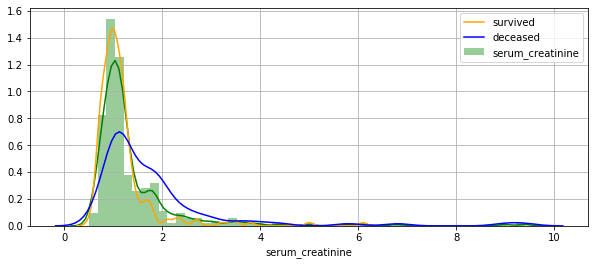

In [44]:
plt.figure(figsize=(10, 4))
sns.distplot(data['serum_creatinine'], hist=True, label='serum_creatinine', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['serum_creatinine'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['serum_creatinine'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

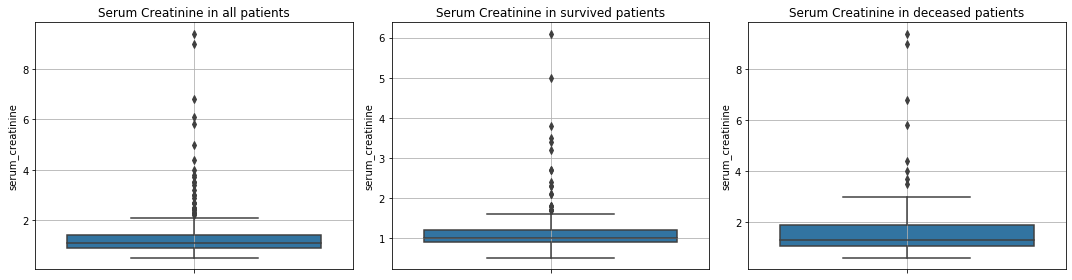

In [45]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['serum_creatinine'], ax=ax1)
ax1.set_title('Serum Creatinine in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['serum_creatinine'], ax=ax2)
ax2.set_title('Serum Creatinine in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['serum_creatinine'], ax=ax3)
ax3.set_title('Serum Creatinine in deceased patients')
ax3.grid()


plt.tight_layout()
plt.show()

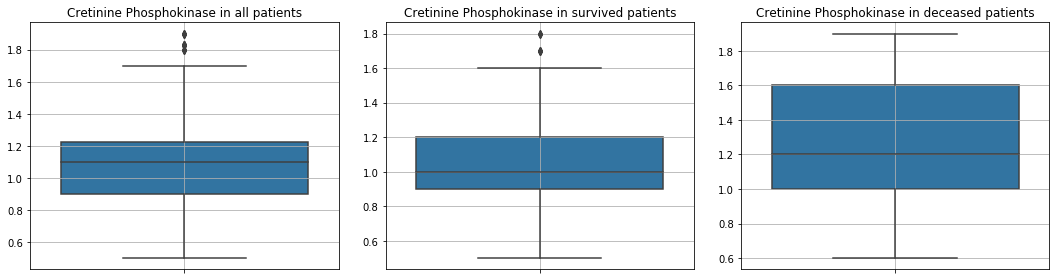

In [46]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=[x for x in data['serum_creatinine'].values if x < 2], ax=ax1)
ax1.set_title('Cretinine Phosphokinase in all patients')
ax1.grid()

ax2=plt.subplot(132)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==0]['serum_creatinine'].values if x < 2], ax=ax2)
ax2.set_title('Cretinine Phosphokinase in survived patients')
ax2.grid()

ax3=plt.subplot(133)
sns.boxplot(y=[x for x in data[data['DEATH_EVENT']==1]['serum_creatinine'].values if x < 2], ax=ax3)
ax3.set_title('Cretinine Phosphokinase in deceased patients')
ax3.grid()

plt.tight_layout()
plt.show()

In [47]:
def bin_serum_creatinine(x):
    """
    for binning serum creatinine
    """
    if x<0.8:
        return 0
    elif (x>=0.8) and (x<1):
        return 1
    elif (x>=1) and (x<1.2):
        return 2
    elif (x>=1.2) and (x<1.4):
        return 3
    elif (x>=1.4) and (x<1.6):
        return 4
    elif (x>=1.6) and (x<2):
        return 5
    elif (x>=2) and (x<3):
        return 6
    elif (x>=3) and (x<5):
        return 7
    else:
        return 8
data['serum_creatinine_bin'] = data['serum_creatinine'].map(bin_serum_creatinine)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3,0,3,5
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7,1,3,2
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1,0,1,3
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1,0,2,5
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1,0,4,6


In [48]:
sc_analysis          = pd.DataFrame(data.groupby(by=['serum_creatinine_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
sc_analysis['Total'] = pd.DataFrame(data.groupby(by=['serum_creatinine_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
sc_analysis['Avg']   = pd.DataFrame(data.groupby(by=['serum_creatinine_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

sc_analysis.head()

,serum_creatinine_bin,DEATH_EVENT,Total,Avg
0,0,3,25,0.120000
1,1,6,56,0.107143
2,2,24,93,0.258065
3,3,16,44,0.363636
4,4,4,14,0.285714


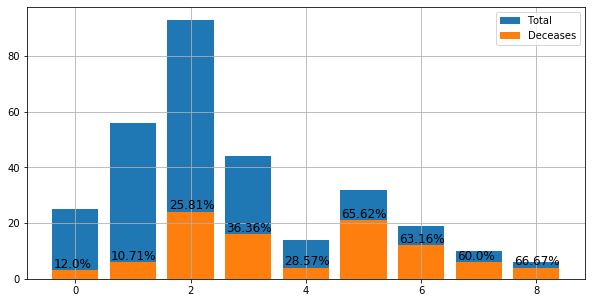

In [49]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(sc_analysis.serum_creatinine_bin)), sc_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(sc_analysis.serum_creatinine_bin)), sc_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.02, i.get_height()+1, str(round(sc_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.grid()
plt.show()

#### [2.5] Serium Sodium

In [50]:
data['serum_sodium'].value_counts().head()

136    40
137    38
140    35
134    32
138    23
Name: serum_sodium, dtype: int64

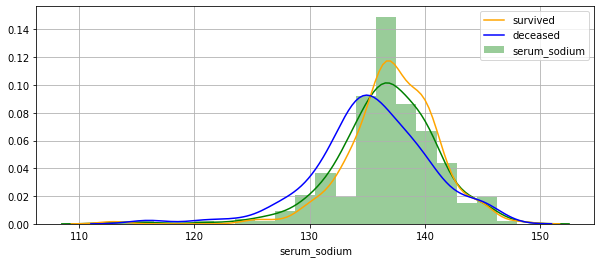

In [51]:
plt.figure(figsize=(10, 4))
sns.distplot(data['serum_sodium'], hist=True, label='serum_sodium', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['serum_sodium'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['serum_sodium'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

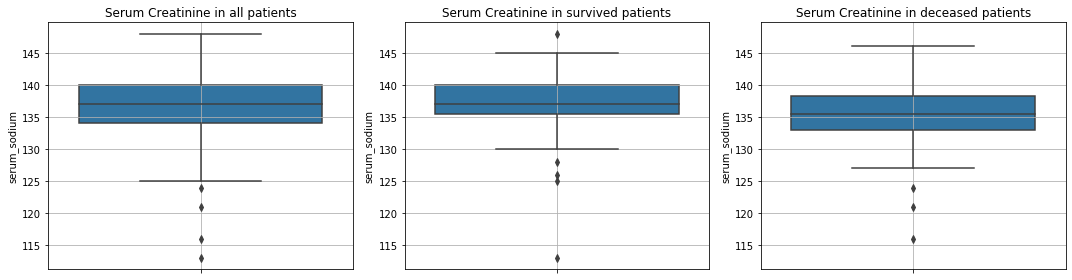

In [52]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['serum_sodium'], ax=ax1)
ax1.set_title('Serum Creatinine in all patients')
ax1.grid()

ax2=plt.subplot(132, sharey=ax1)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['serum_sodium'], ax=ax2)
ax2.set_title('Serum Creatinine in survived patients')
ax2.grid()

ax3=plt.subplot(133, sharey=ax2)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['serum_sodium'], ax=ax3)
ax3.set_title('Serum Creatinine in deceased patients')
ax3.grid()


plt.tight_layout()
plt.show()

In [53]:
def bin_serum_sodium(x):
    """
    for binning serum sodium levels
    """
    if x<125:
        return 0
    elif (x>=125) and (x<130):
        return 1
    elif (x>=130) and (x<135):
        return 2
    elif (x>=135) and (x<140):
        return 3
    elif (x>=140) and (x<145):
        return 4
    elif (x>=145) and (x<150):
        return 5
    else:
        return 6
data['serum_sodium_bin'] = data['serum_sodium'].map(bin_serum_sodium)
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin,serum_sodium_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3,0,3,5,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7,1,3,2,3
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1,0,1,3,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1,0,2,5,3
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1,0,4,6,0


In [54]:
ss_analysis          = pd.DataFrame(data.groupby(by=['serum_sodium_bin'])['DEATH_EVENT']\
                                    .agg(lambda x:x.eq(1).sum())).reset_index()
ss_analysis['Total'] = pd.DataFrame(data.groupby(by=['serum_sodium_bin'])['DEATH_EVENT']\
                                    .agg(total='count')).reset_index()['total']
ss_analysis['Avg']   = pd.DataFrame(data.groupby(by=['serum_sodium_bin'])['DEATH_EVENT']\
                                    .agg(avg='mean')).reset_index()['avg']

ss_analysis.head()

,serum_sodium_bin,DEATH_EVENT,Total,Avg
0,0,3,4,0.750000
1,1,6,9,0.666667
2,2,33,70,0.471429
3,3,36,139,0.258993
4,4,14,66,0.212121


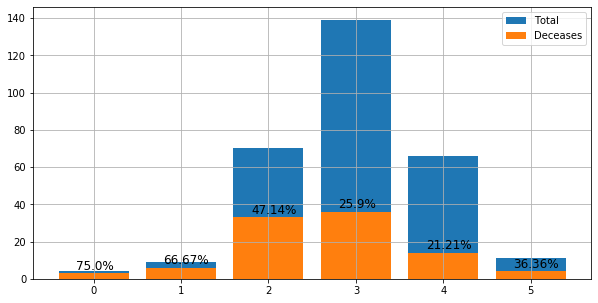

In [55]:
plt.figure(figsize=(10, 5))
b1 = plt.bar(np.arange(len(ss_analysis.serum_sodium_bin)), ss_analysis['Total'], label='Total')
b2 = plt.bar(np.arange(len(ss_analysis.serum_sodium_bin)), ss_analysis['DEATH_EVENT'], label='Deceases')

for indx, i in enumerate(b2.patches):
    plt.text(i.get_x()+.20, i.get_height()+2, str(round(ss_analysis.Avg[indx]*100, 2))+'%', fontsize=12, color='black')
    
plt.legend()
plt.grid()
plt.show()

#### [2.6] Time Analysis

In [60]:
data['time'].value_counts().head()

187    7
250    7
186    6
107    6
10     6
Name: time, dtype: int64

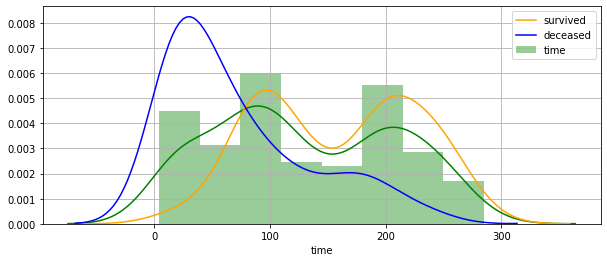

In [61]:
plt.figure(figsize=(10, 4))
sns.distplot(data['time'], hist=True, label='time', color='Green')
sns.distplot(data[data['DEATH_EVENT']==0]['time'], hist=False, label='survived', color='orange')
sns.distplot(data[data['DEATH_EVENT']==1]['time'], hist=False, label='deceased', color='blue')
plt.grid()
plt.legend()
plt.show()

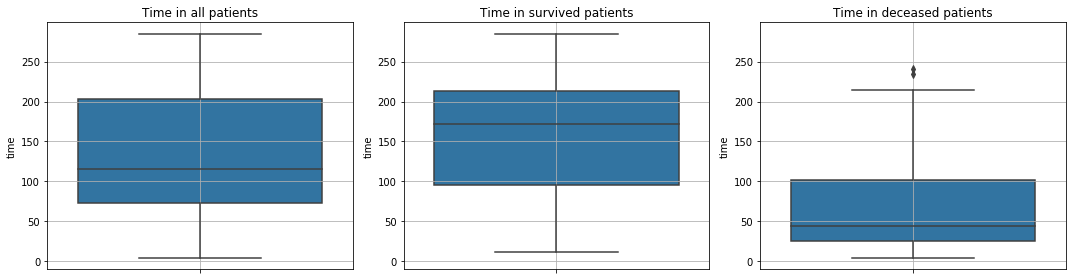

In [62]:
#plotting the box plot
plt.figure(figsize=(15, 4))

ax1=plt.subplot(131)
sns.boxplot(y=data['time'], ax=ax1)
ax1.set_title('Time in all patients')
ax1.grid()

ax2=plt.subplot(132, sharey=ax1)
sns.boxplot(y=data[data['DEATH_EVENT']==0]['time'], ax=ax2)
ax2.set_title('Time in survived patients')
ax2.grid()

ax3=plt.subplot(133, sharey=ax2)
sns.boxplot(y=data[data['DEATH_EVENT']==1]['time'], ax=ax3)
ax3.set_title('Time in deceased patients')
ax3.grid()


plt.tight_layout()
plt.show()

<hr>
<h2>Data Preparation</h2>

In [56]:
data.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin,serum_sodium_bin
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1,4,3,0,3,5,2
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1,2,7,1,3,2,3
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1,3,1,0,1,3,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1,2,1,0,2,5,3
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1,3,1,0,4,6,0


In [63]:
final_data = data[['sex', 'anaemia', 'high_blood_pressure', 'smoking', 'diabetes', \
                   'age_bin', 'creatinine_phosphokinase_bin', 'ejection_fraction_bin', \
                   'platelates_bin', 'serum_creatinine_bin', 'serum_sodium_bin', \
                   'DEATH_EVENT']]

In [64]:
final_data.head()

,sex,anaemia,high_blood_pressure,smoking,diabetes,age_bin,creatinine_phosphokinase_bin,ejection_fraction_bin,platelates_bin,serum_creatinine_bin,serum_sodium_bin,DEATH_EVENT
0,1,0,1,0,0,4,3,0,3,5,2,1
1,1,0,0,0,0,2,7,1,3,2,3,1
2,1,0,0,1,0,3,1,0,1,3,1,1
3,1,1,0,0,0,2,1,0,2,5,3,1
4,0,1,0,0,1,3,1,0,4,6,0,1


In [65]:
final_data.to_csv('./heart_failure_final.csv', index=False)